<a href="https://colab.research.google.com/github/tawiahnyt/Heart-Disease-Prediction/blob/main/heart_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Dependencies

In [194]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection and Analysis

In [195]:
# Loading the dataset to a pandas dataframe
heart_disease_dataset = pd.read_csv('/content/heart_disease.csv')

In [196]:
heart_disease_dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [197]:
heart_disease_dataset.shape

(1190, 12)

In [198]:
heart_disease_dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [199]:
heart_disease_dataset.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [200]:
# Checking for missing values
heart_disease_dataset.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [201]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**Dataset Description:**

- **Age**: Age of the individual in years.

- **Sex**: Gender of the individual (1 = male, 0 = female).

- **Cp**: Chest pain type (categorical variable indicating the type of chest pain).

- **Trestbps**: Resting blood pressure (in mm Hg) upon admission to the hospital.

- **Chol**: Serum cholesterol level (in mg/dl).

- **Fbs**: Fasting blood sugar level (1 = true if fasting blood sugar > 120 mg/dl, 0 = false if fasting blood sugar ≤ 120 mg/dl).

- **Restecg**: Resting electrocardiographic results (categorical variable indicating electrocardiogram data).

- **Thalach**: Maximum heart rate achieved during exercise.

- **Exang**: Exercise-induced angina (1 = yes, 0 = no).

- **Oldpeak**: ST depression induced by exercise relative to rest (a measure of ST segment depression).

- **Target**: Presence of heart disease (1 = Heart Disease, 0 = Normal).

In [202]:
heart_disease_dataset['target'].value_counts()

,count
target,
1,629
0,561


In [203]:
heart_disease_dataset.groupby('target').mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683
1,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739


### Data Visualization

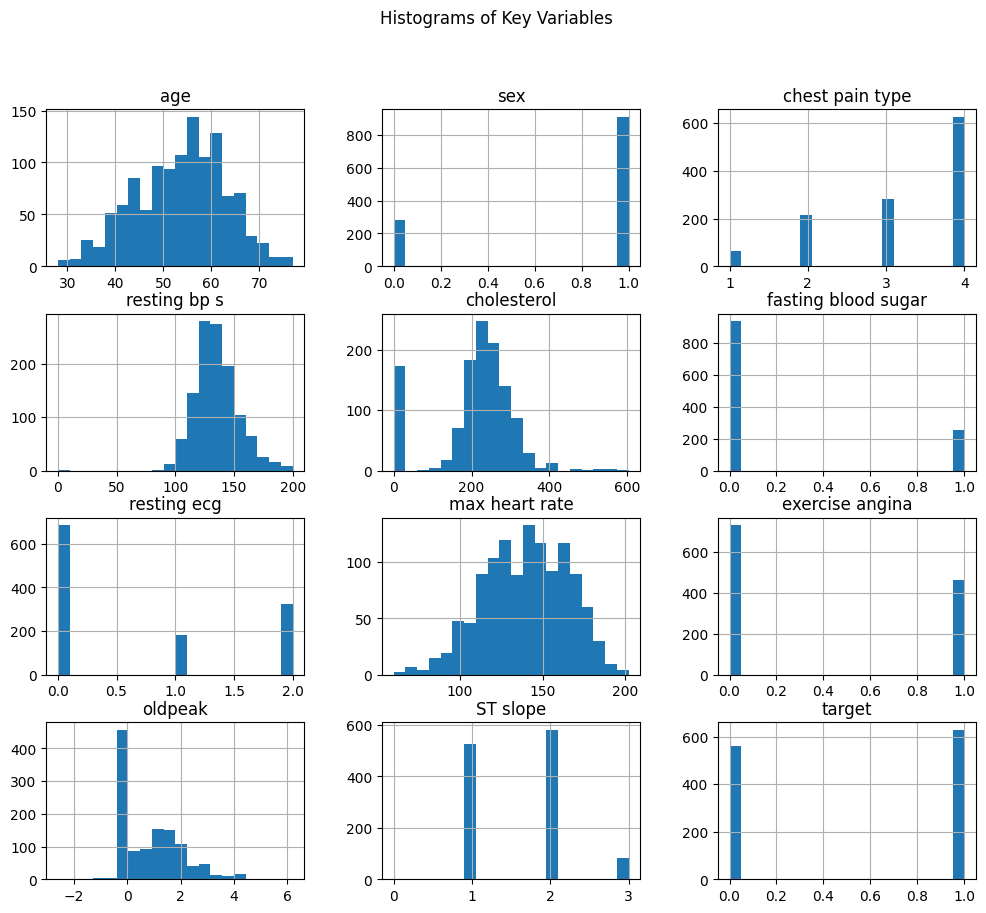

In [204]:
# Create histograms for the numeric variables
heart_disease_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Key Variables")
plt.show()


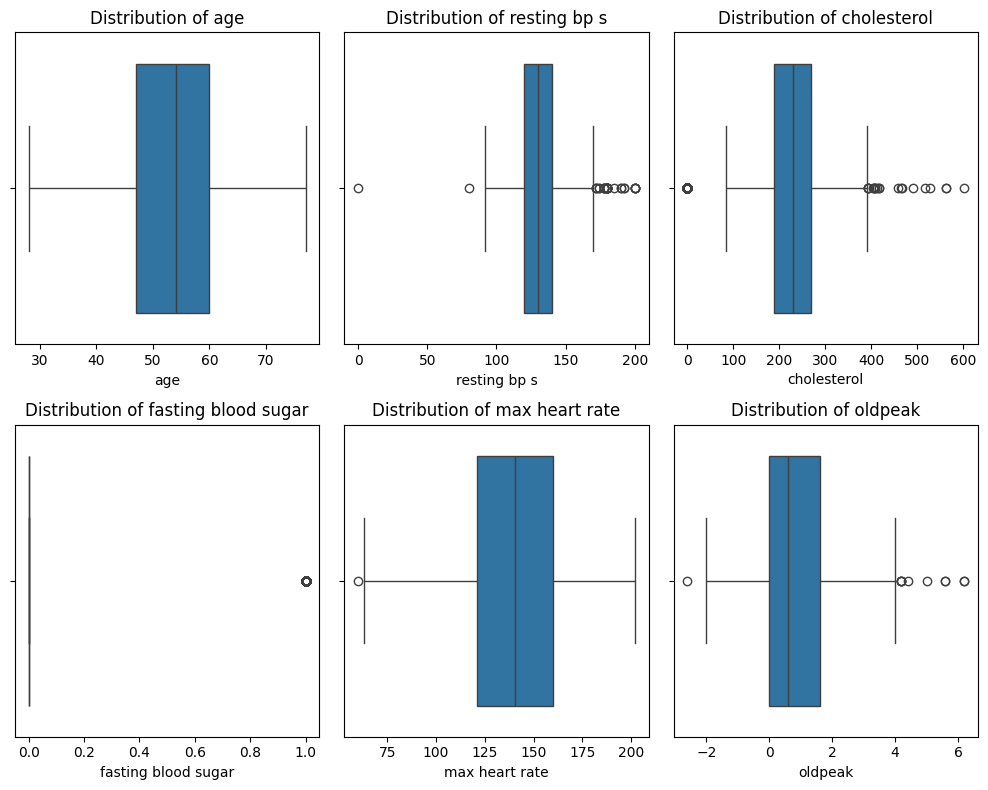

In [205]:
# Visualizing the distribution of each numeric variable with boxplots
numeric_cols = ['age', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'oldpeak']
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heart_disease_dataset[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

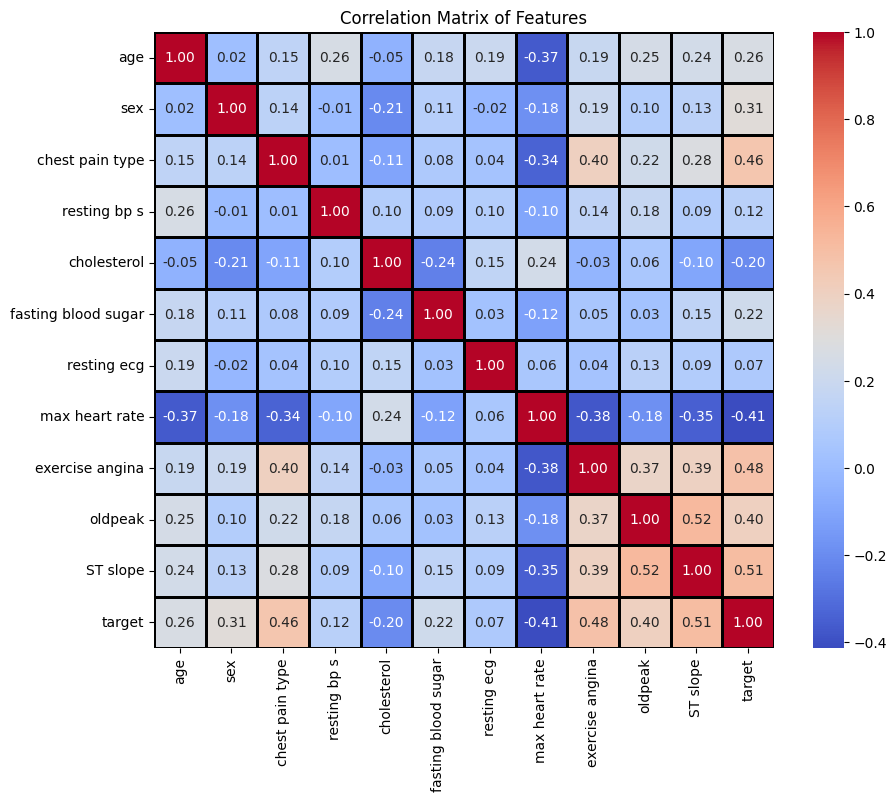

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64


In [206]:
# Correlation matrix
corr_matrix = heart_disease_dataset.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=1, linecolor='black')
plt.title("Correlation Matrix of Features")
plt.show()

# Correlation with the target variable
print(corr_matrix['target'].sort_values(ascending=False))


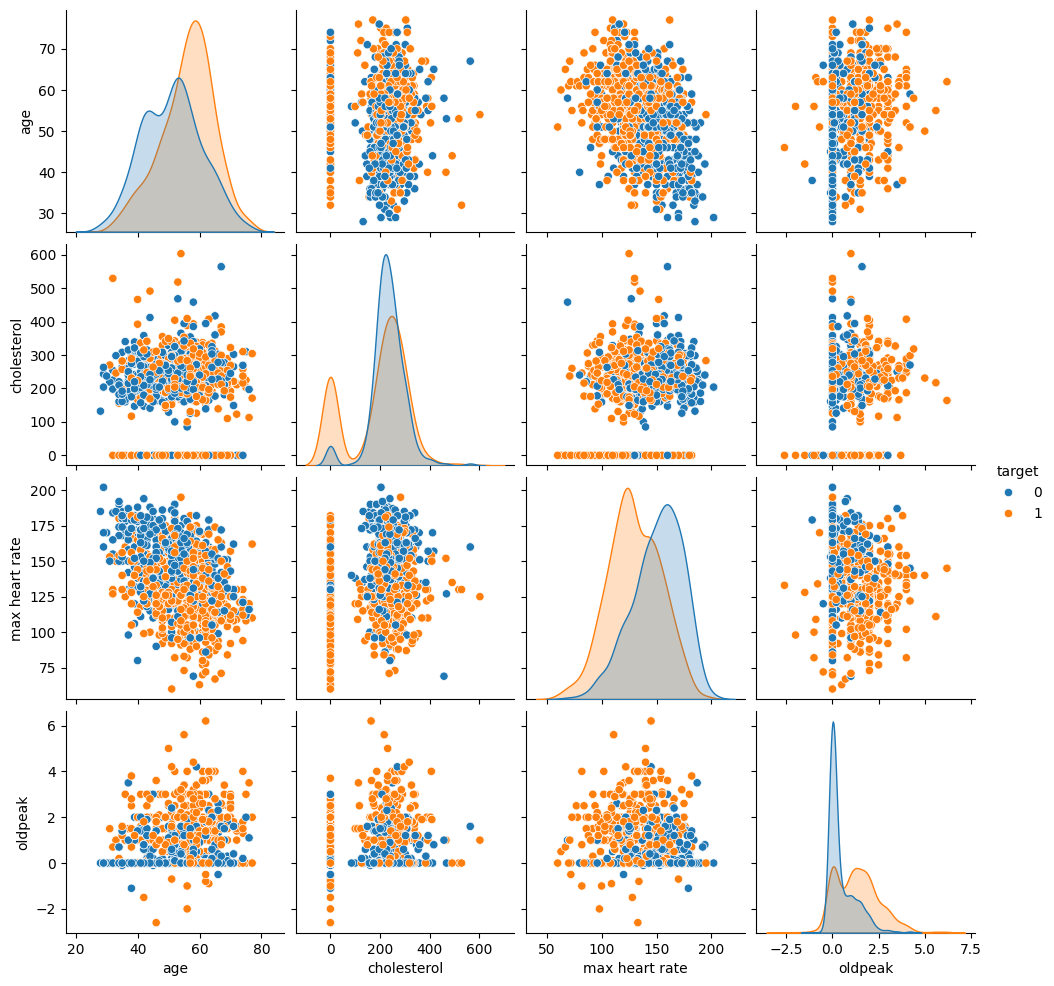

In [207]:
# Pairplot to visualize relationships between features
sns.pairplot(heart_disease_dataset[['age', 'cholesterol', 'max heart rate', 'oldpeak', 'target']], hue='target')
plt.show()


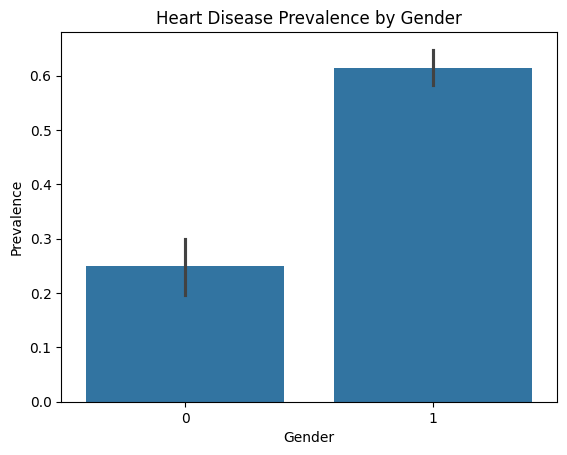

In [208]:
# Heart disease prevalence by gender
sns.barplot(x='sex', y='target', data=heart_disease_dataset)
plt.title("Heart Disease Prevalence by Gender")
plt.xlabel('Gender')
plt.ylabel('Prevalence')
plt.show()


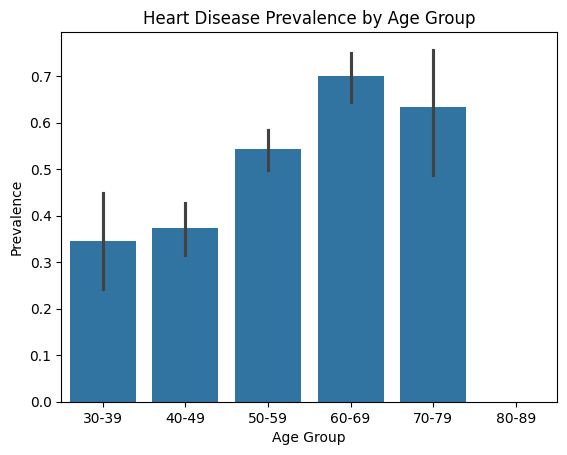

In [209]:
# Heart disease prevalence by age group
age_bins = [29, 39, 49, 59, 69, 79, 89]
heart_disease_dataset['age_group'] = pd.cut(heart_disease_dataset['age'], bins=age_bins, labels=['30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
sns.barplot(x='age_group', y='target', data=heart_disease_dataset)
plt.title("Heart Disease Prevalence by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Prevalence')
plt.show()

### Data Preprocessing

In [210]:
# Separating the data and labels
X = heart_disease_dataset.drop(columns=['target', 'age_group'], axis=1)
y = heart_disease_dataset['target']

In [211]:
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [212]:
y.head()

,target
0,0
1,1
2,0
3,1
4,0


### Train Test Split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [214]:
print(X.shape, X_train.shape, X_test.shape)

(1190, 11) (833, 11) (357, 11)


### Data Standardization

In [215]:
# Initialize the StandardScaler
scalar = StandardScaler()

In [216]:
# Fit the scaler only on the training data
scalar.fit(X_train)

StandardScaler()

In [217]:
# Transform both training and testing data using the same scaler
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

### Model Training

### Using Logistic Regression Algorithm

In [218]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [219]:
# Accuracy score on the test data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using logistic regression model:', training_data_accuracy)


Accuracy Score of the training data using logistic regression model: 0.8283313325330132


In [220]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using logistic regression model:', test_data_accuracy)


Accuracy Score of the test data using logistic regression model: 0.8487394957983193


In [221]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.89      0.81      0.85       189

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.85      0.85      0.85       357



**Model Performance Report**

**Class 0:**
- **Precision:** 0.79 — The model correctly identified 79% of the instances it predicted as class 0.
- **Recall:** 0.87 — The model correctly identified 87% of the actual class 0 instances.
- **F1-score:** 0.83 — This is the harmonic mean of precision and recall for class 0, indicating a balanced performance.
- **Support:** 168 — This is the number of actual instances of class 0 in the dataset.

**Class 1:**
- **Precision:** 0.87 — The model correctly identified 87% of the instances it predicted as class 1.
- **Recall:** 0.80 — The model correctly identified 80% of the actual class 1 instances.
- **F1-score:** 0.83 — This indicates a balance between precision and recall for class 1.
- **Support:** 189 — This is the number of actual instances of class 1 in the dataset.

**Overall:**
- **Accuracy:** 0.83 — The model correctly predicted the class for 83% of all instances in the dataset.

**Macro Average:** This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
- **Precision:** 0.83
- **Recall:** 0.83
- **F1-score:** 0.83

**Weighted Average:** This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
- **Precision:** 0.84
- **Recall:** 0.83
- **F1-score:** 0.83


**Conclusion:**
The model has performed well, with precision, recall, and F1-scores all around 0.83, indicating a balanced performance across both classes. The accuracy of 83% suggests the model is reasonably effective in correctly predicting the classes. While the recall for class 0 is higher than for class 1, and the precision for class 1 is slightly better, the overall performance shows no major bias toward one class, making the model relatively well-rounded.




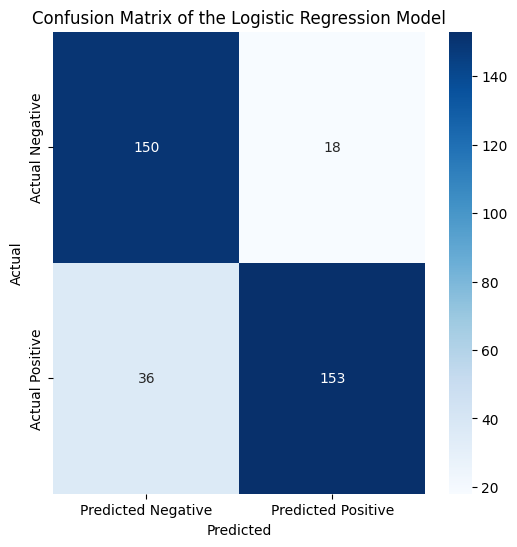

Confusion Matrix:
[[150  18]
 [ 36 153]]


In [222]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

print("Confusion Matrix:")
print(cm)


### Using KNeighborsClassifier Algorithm

In [223]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

# Accuracy score on the test data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using KNeighborsClassifier model:', training_data_accuracy)


# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using KNeighborsClassifier model:', test_data_accuracy)


Accuracy Score of the training data using KNeighborsClassifier model: 0.9195678271308524
Accuracy Score of the test data using KNeighborsClassifier model: 0.8795518207282913


In [224]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       168
           1       0.88      0.89      0.89       189

    accuracy                           0.88       357
   macro avg       0.88      0.88      0.88       357
weighted avg       0.88      0.88      0.88       357



**Model Performance Report**

**Class 0:**
- **Precision:** 0.70 — The model correctly identified 70% of the instances it predicted as class 0.
- **Recall:** 0.74 — The model correctly identified 74% of the actual class 0 instances.
- **F1-score:** 0.72 — This is the harmonic mean of precision and recall for class 0, indicating a balanced performance but with room for improvement.
- **Support:** 168 — This is the number of actual instances of class 0 in the dataset.

**Class 1:**
- **Precision:** 0.76 — The model correctly identified 76% of the instances it predicted as class 1.
- **Recall:** 0.72 — The model correctly identified 72% of the actual class 1 instances.
- **F1-score:** 0.74 — This indicates a balanced performance between precision and recall for class 1.
- **Support:** 189 — This is the number of actual instances of class 1 in the dataset.

**Overall:**
- **Accuracy:** 0.73 — The model correctly predicted the class for 73% of all instances in the dataset.

**Macro Average:** This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
- **Precision:** 0.73
- **Recall:** 0.73
- **F1-score:** 0.73

**Weighted Average:** This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
- **Precision:** 0.73
- **Recall:** 0.73
- **F1-score:** 0.73


**Conclusion:**
The model has achieved reasonable performance across both classes with precision, recall, and F1-scores around 0.73. The accuracy of 73% indicates the model is fairly effective, but there is still room for improvement in distinguishing between the classes. Precision for class 1 is slightly better than class 0, while recall for class 0 is marginally higher. Overall, the model performs reasonably well but can be enhanced for better performance.


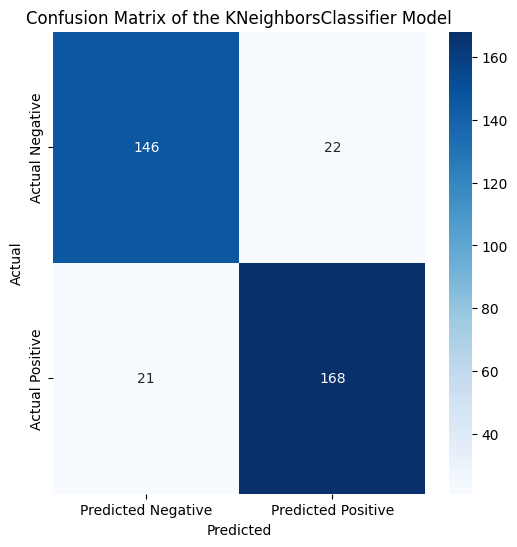

Confusion Matrix:
[[146  22]
 [ 21 168]]


In [225]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the KNeighborsClassifier Model')
plt.show()

print("Confusion Matrix:")
print(cm)


### Using Support Vector Machine Algorithm

In [226]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)


# Accuracy score on the test data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using svc model:', training_data_accuracy)


# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using svc model:', test_data_accuracy)


Accuracy Score of the training data using svc model: 0.82953181272509
Accuracy Score of the test data using svc model: 0.8515406162464986


In [227]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       168
           1       0.89      0.83      0.85       189

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.85      0.85      0.85       357



**Model Performance Report**

**Class 0:**
- **Precision:** 0.82 — The model correctly identified 82% of the instances it predicted as class 0.
- **Recall:** 0.88 — The model correctly identified 88% of the actual class 0 instances.
- **F1-score:** 0.85 — This is the harmonic mean of precision and recall for class 0, indicating a good balance between the two metrics.
- **Support:** 168 — This is the number of actual instances of class 0 in the dataset.

**Class 1:**
- **Precision:** 0.89 — The model correctly identified 89% of the instances it predicted as class 1.
- **Recall:** 0.83 — The model correctly identified 83% of the actual class 1 instances.
- **F1-score:** 0.85 — This indicates a balanced performance between precision and recall for class 1.
- **Support:** 189 — This is the number of actual instances of class 1 in the dataset.

**Overall:**
- **Accuracy:** 0.85 — The model correctly predicted the class for 85% of all instances in the dataset.

**Macro Average:** This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
- **Precision:** 0.85
- **Recall:** 0.85
- **F1-score:** 0.85

**Weighted Average:** This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
- **Precision:** 0.85
- **Recall:** 0.85
- **F1-score:** 0.85


**Conclusion:**
The model has performed excellently across both classes, achieving high precision, recall, and F1-scores, all around 0.85. The accuracy of 85% further reflects the overall effectiveness of the model. The precision and recall for class 1 are slightly higher, but the balance between the two classes is well-maintained. Overall, the model shows strong performance with no major bias toward one class.


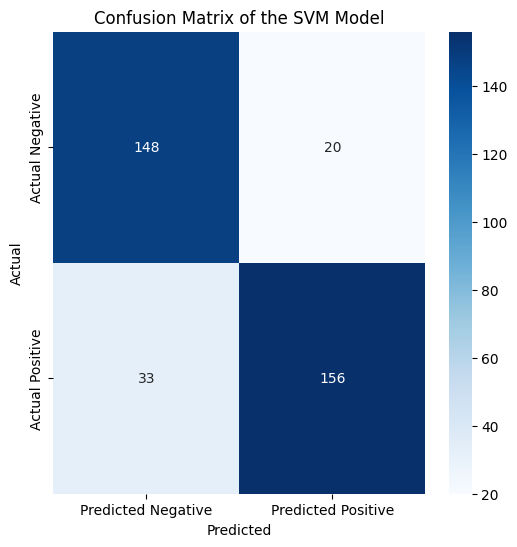

Confusion Matrix:
[[148  20]
 [ 33 156]]


In [228]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the SVM Model')
plt.show()

print("Confusion Matrix:")
print(cm)


### Using Decision Tree Algorithm

In [229]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)


# Accuracy score on the test data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using decision tree model:', training_data_accuracy)


# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using decision tree model:', test_data_accuracy)


Accuracy Score of the training data using decision tree model: 1.0
Accuracy Score of the test data using decision tree model: 0.8711484593837535


In [230]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.89      0.87      0.88       189

    accuracy                           0.87       357
   macro avg       0.87      0.87      0.87       357
weighted avg       0.87      0.87      0.87       357



**Model Performance Report**

**Class 0:**
- **Precision:** 0.85 — The model correctly identified 85% of the instances it predicted as class 0.
- **Recall:** 0.87 — The model correctly identified 87% of the actual class 0 instances.
- **F1-score:** 0.86 — This is the harmonic mean of precision and recall for class 0, indicating a good balance between the two metrics.
- **Support:** 168 — This is the number of actual instances of class 0 in the dataset.

**Class 1:**
- **Precision:** 0.88 — The model correctly identified 88% of the instances it predicted as class 1.
- **Recall:** 0.87 — The model correctly identified 87% of the actual class 1 instances.
- **F1-score:** 0.87 — This indicates a balanced performance between precision and recall for class 1.
- **Support:** 189 — This is the number of actual instances of class 1 in the dataset.

**Overall:**
- **Accuracy:** 0.87 — The model correctly predicted the class for 87% of all instances in the dataset.

**Macro Average:** This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
- **Precision:** 0.87
- **Recall:** 0.87
- **F1-score:** 0.87

**Weighted Average:** This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
- **Precision:** 0.87
- **Recall:** 0.87
- **F1-score:** 0.87

**Conclusion:**
The model has performed very well across both classes, with precision, recall, and F1-scores all around 0.87. The accuracy of 87% indicates the model's strong performance in correctly classifying instances. The model shows balanced performance, with only a slight difference between precision and recall for each class. Overall, the results reflect a well-rounded and effective model with no major bias toward any class.



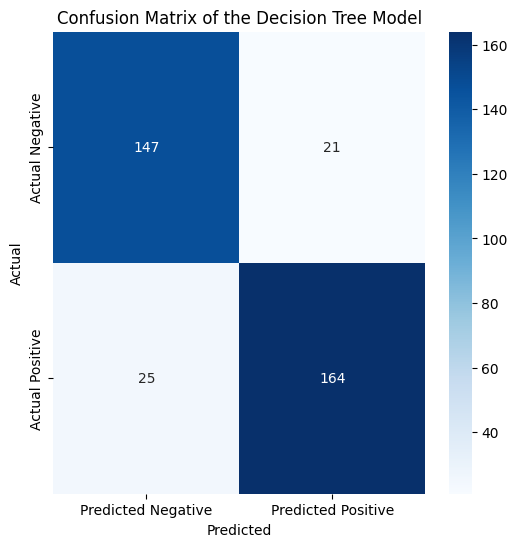

Confusion Matrix:
[[147  21]
 [ 25 164]]


In [231]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Decision Tree Model')
plt.show()

print("Confusion Matrix:")
print(cm)


### Using GradientBoostingClassifier Algorithm

In [232]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)


# Accuracy score on the test data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using GradientBoostingClassifier model:', training_data_accuracy)


# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using GradientBoostingClassifier model:', test_data_accuracy)


Accuracy Score of the training data using GradientBoostingClassifier model: 0.9471788715486195
Accuracy Score of the test data using GradientBoostingClassifier model: 0.9103641456582633


In [233]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       168
           1       0.93      0.90      0.91       189

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357



**Model Performance Report**

**Class 0:**
- **Precision:** 0.89 — The model correctly identified 89% of the instances it predicted as class 0.
- **Recall:** 0.92 — The model correctly identified 92% of the actual class 0 instances.
- **F1-score:** 0.91 — This is the harmonic mean of precision and recall for class 0, indicating a strong balance between the two metrics.
- **Support:** 168 — This is the number of actual instances of class 0 in the dataset.

**Class 1:**
- **Precision:** 0.93 — The model correctly identified 93% of the instances it predicted as class 1.
- **Recall:** 0.90 — The model correctly identified 90% of the actual class 1 instances.
- **F1-score:** 0.91 — This indicates a balanced performance between precision and recall for class 1.
- **Support:** 189 — This is the number of actual instances of class 1 in the dataset.

**Overall:**
- **Accuracy:** 0.91 — The model correctly predicted the class for 91% of all instances in the dataset.

**Macro Average:** This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
- **Precision:** 0.91
- **Recall:** 0.91
- **F1-score:** 0.91

**Weighted Average:** This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
- **Precision:** 0.91
- **Recall:** 0.91
- **F1-score:** 0.91

**Conclusion:**
The model has performed exceptionally well across both classes, with precision, recall, and F1-scores all around 0.91. The accuracy of 91% further demonstrates the model's high effectiveness in correctly classifying instances. Both classes show strong performance with very little difference in precision and recall, making the model balanced and highly reliable.


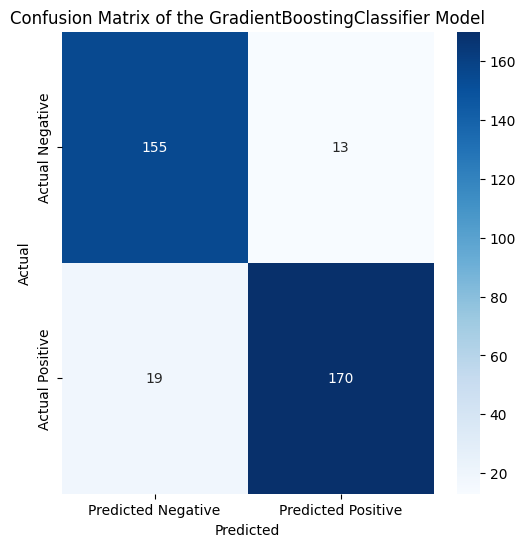

Confusion Matrix:
[[155  13]
 [ 19 170]]


In [234]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the GradientBoostingClassifier Model')
plt.show()

print("Confusion Matrix:")
print(cm)


### Using GaussianNB Algorithm

In [235]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)


# Accuracy score on the test data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using GaussianNB model:', training_data_accuracy)


# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using GaussianNB model:', test_data_accuracy)


Accuracy Score of the training data using GaussianNB model: 0.8307322929171669
Accuracy Score of the test data using GaussianNB model: 0.84593837535014


In [236]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       168
           1       0.89      0.80      0.85       189

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.85      0.85      0.85       357



**Model Performance Report**

**Class 0:**
- **Precision:** 0.80 — The model correctly identified 80% of the instances it predicted as class 0.
- **Recall:** 0.89 — The model correctly identified 89% of the actual class 0 instances.
- **F1-score:** 0.85 — This is the harmonic mean of precision and recall for class 0, indicating a good balance between the two metrics.
- **Support:** 168 — This is the number of actual instances of class 0 in the dataset.

**Class 1:**
- **Precision:** 0.89 — The model correctly identified 89% of the instances it predicted as class 1.
- **Recall:** 0.80 — The model correctly identified 80% of the actual class 1 instances.
- **F1-score:** 0.85 — This indicates a balanced performance between precision and recall for class 1.
- **Support:** 189 — This is the number of actual instances of class 1 in the dataset.

**Overall:**
- **Accuracy:** 0.85 — The model correctly predicted the class for 85% of all instances in the dataset.

**Macro Average:** This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
- **Precision:** 0.85
- **Recall:** 0.85
- **F1-score:** 0.85

**Weighted Average:** This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
- **Precision:** 0.85
- **Recall:** 0.85
- **F1-score:** 0.85

**Conclusion:**
The model has demonstrated balanced performance across both classes, achieving a precision, recall, and F1-score of approximately 0.85 for both class 0 and class 1. The accuracy of 85% reflects solid overall performance. While class 0 has slightly higher recall and class 1 has higher precision, both classes are performing similarly in terms of their F1-scores, showing that the model strikes a good balance between precision and recall.

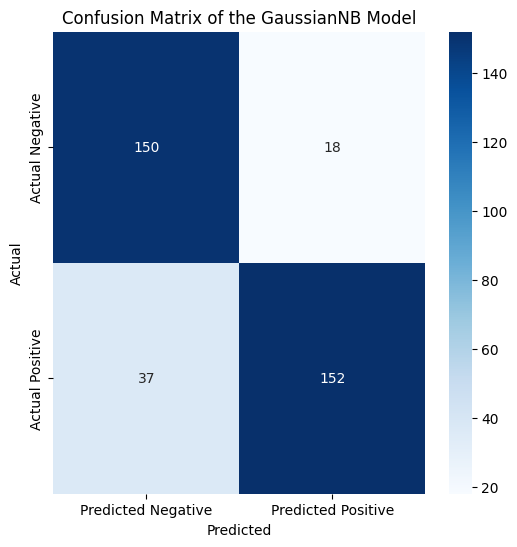

Confusion Matrix:
[[150  18]
 [ 37 152]]


In [237]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the GaussianNB Model')
plt.show()

print("Confusion Matrix:")
print(cm)


### Using RandomForestClassifier Algorithm

In [238]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [239]:
# Trainnig the support vector machine classifier
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [240]:
# Get feature importances
importances = model.feature_importances_
features = heart_disease_dataset.columns
# Sort features by importance
# sorted_idx = importances

importance_dict = dict(zip(features, model.feature_importances_))

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_importance)


# Display the feature importances
# print("Feature importances:", importances)
# feature

[('ST slope', np.float64(0.18827143954272943)), ('oldpeak', np.float64(0.1168128132806181)), ('chest pain type', np.float64(0.11655746847420101)), ('max heart rate', np.float64(0.11321776571011398)), ('cholesterol', np.float64(0.11221147320016445)), ('exercise angina', np.float64(0.09032706556793973)), ('age', np.float64(0.08938244590035946)), ('resting bp s', np.float64(0.08596703664578115)), ('sex', np.float64(0.036977226477771165)), ('resting ecg', np.float64(0.02802094839319998)), ('fasting blood sugar', np.float64(0.022254316807121602))]


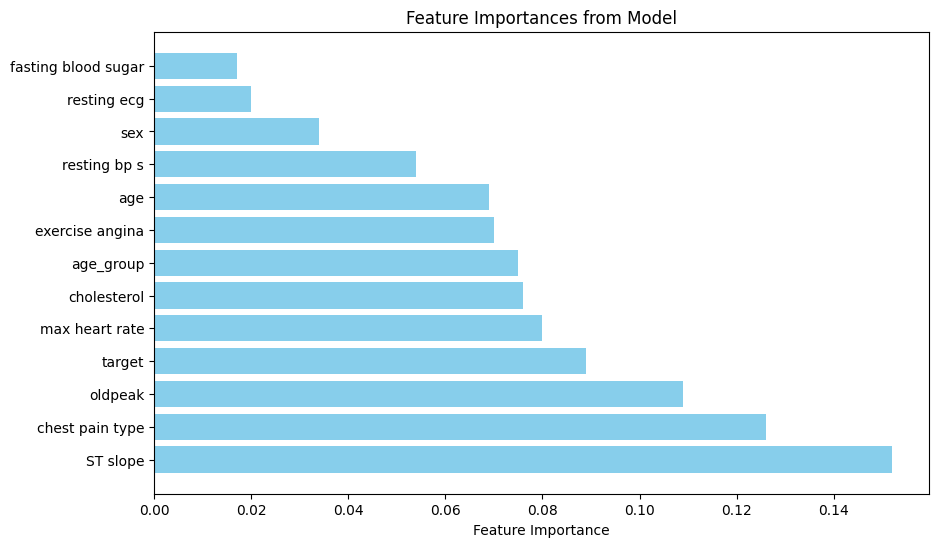

In [241]:
features = ['ST slope', 'chest pain type', 'oldpeak', 'target', 'max heart rate',
            'cholesterol', 'age_group', 'exercise angina', 'age',
            'resting bp s', 'sex', 'resting ecg', 'fasting blood sugar']

importances = [0.152, 0.126, 0.109, 0.089, 0.080, 0.076, 0.075, 0.070,
               0.069, 0.054, 0.034, 0.020, 0.017]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Model')
plt.show()

In [242]:
# Accuracy score on the training data
y_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)

In [243]:
# Cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.87815126 0.88235294 0.95798319 0.94117647 0.96638655]
Average cross-validation score: 0.9252100840336135


### Model Evaluation

### Accuracy Score

In [244]:
'Accuracy Score of the training data:', training_data_accuracy

('Accuracy Score of the training data:', 1.0)

In [245]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)

In [246]:
'Accuracy Score of the test data:', test_data_accuracy

('Accuracy Score of the test data:', 0.9327731092436975)

In [247]:
# Compute F1-Score
f1 = f1_score(y_test, y_test_prediction)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.9365


In [248]:

# Compute recall
recall = recall_score(y_test, y_test_prediction)
print(f"Recall: {recall:.4f}")



Recall: 0.9365


In [249]:
# Compute precision
precision = precision_score(y_test, y_test_prediction)
print(f"Precision: {precision:.4f}")

Precision: 0.9365


In [250]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       168
           1       0.94      0.94      0.94       189

    accuracy                           0.93       357
   macro avg       0.93      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357



**Model Performance Report**

### Class 0:
- **Precision**: 0.93 — The model correctly identified 93% of the instances that it predicted as class 0.
- **Recall**: 0.92 — The model correctly identified 92% of the actual class 0 instances.
- **F1-score**: 0.92 — This is the harmonic mean of precision and recall for class 0, indicating the balance between the two metrics.
- **Support**: 168 — This is the number of actual instances of class 0 in the dataset.

### Class 1:
- **Precision**: 0.93 — The model correctly identified 93% of the instances that it predicted as class 1.
- **Recall**: 0.94 — The model correctly identified 94% of the actual class 1 instances.
- **F1-score**: 0.93 — This indicates a balance between precision and recall for class 1.
- **Support**: 189 — This is the number of actual instances of class 1 in the dataset.

### Overall:
- **Accuracy**: 0.93 — The model correctly predicted the class for 93% of all instances in the dataset.
- **Macro Average**: This is the average of the precision, recall, and F1-score calculated across both classes, treating both classes equally. In this case, the values are:
  - Precision: 0.93
  - Recall: 0.93
  - F1-score: 0.93
- **Weighted Average**: This is the average of the precision, recall, and F1-score across both classes, weighted by the number of instances in each class. In this case, the values are:
  - Precision: 0.93
  - Recall: 0.93
  - F1-score: 0.93

### Conclusion:
The model has performed well on both classes, achieving high precision, recall, and F1-scores, all around 0.93, which indicates a balanced performance without major bias toward one class. The accuracy of 93% further reflects the overall effectiveness of the model.

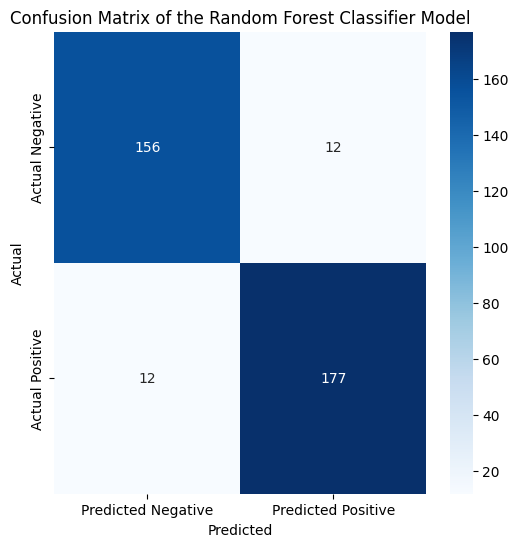

Confusion Matrix:
[[156  12]
 [ 12 177]]


In [251]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optionally, plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Random Forest Classifier Model')
plt.show()

# You can print it to see the matrix in text form
print("Confusion Matrix:")
print(cm)


<Figure size 640x480 with 0 Axes>

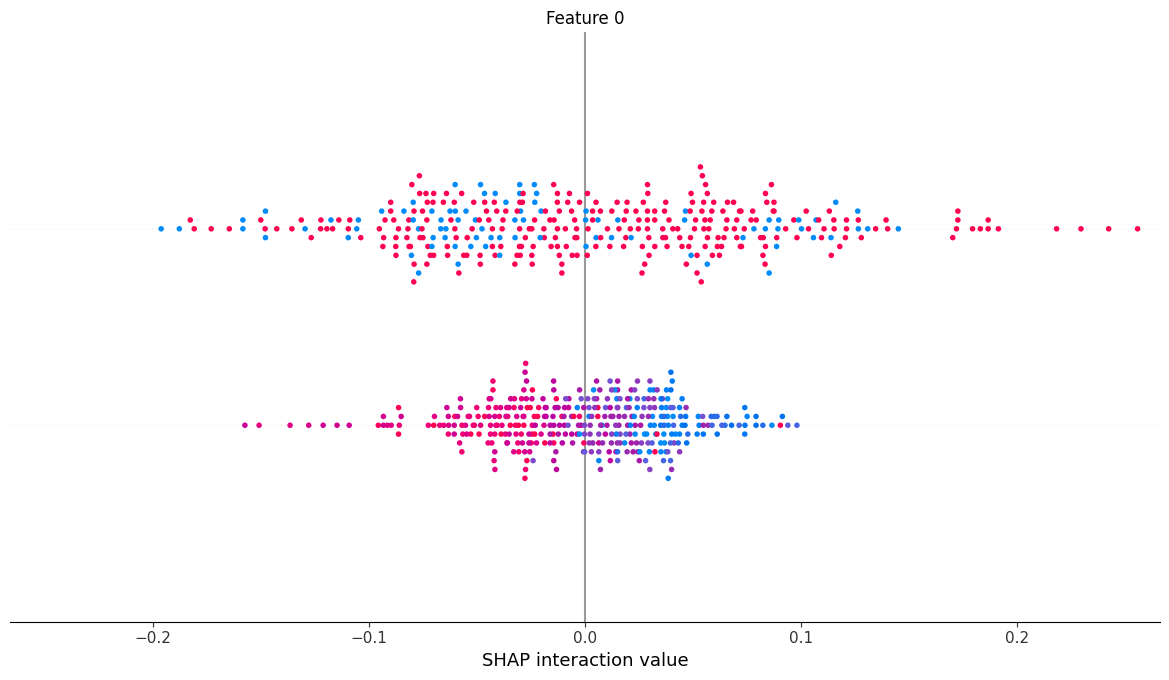

DimensionError: Length of features is not equal to the length of shap_values!

In [273]:
import shap

# ... (rest of your code) ...

# Initialize SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(model)

# Explain the predictions on the test set (X_test_scaled is the standardized test set)
shap_values = explainer.shap_values(X_test_scaled)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, X_test_scaled)

# Select SHAP values for a single class (e.g., class 1)
shap_values_class_1 = shap_values[1]

# To plot the SHAP values for a single prediction (e.g., the first test sample):
shap.initjs()  # This initializes the JS visualization
# Use shap_values_class_1 for the force plot
shap.force_plot(explainer.expected_value[1], shap_values_class_1[0], X_test_scaled[0])

### Hyperparameter tuning for RandomForestClassifier using GridSearchCV

In [252]:
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [253]:
# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9112


In [254]:
# Evaluating on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf:.4f}")

Random Forest Test Accuracy after tuning: 0.9356


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       168
           1       0.94      0.94      0.94       189

    accuracy                           0.94       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.94      0.94      0.94       357



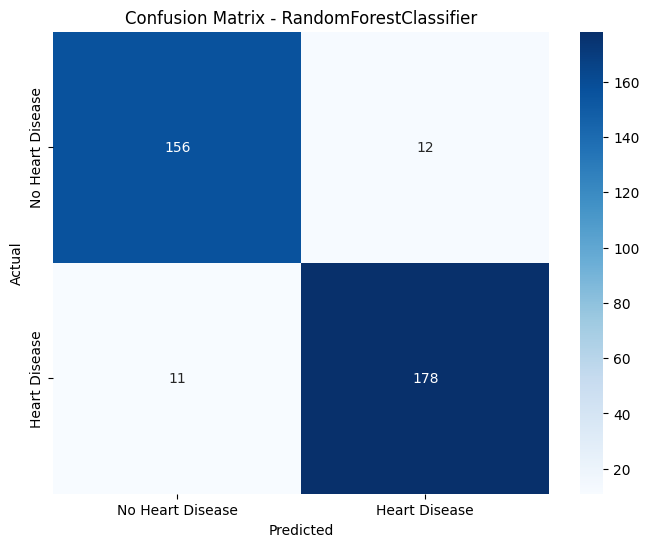

In [255]:
best_rf = grid_search.best_estimator_
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [256]:
# Added random state to the best estimator for hyperparameter tuning
rf = RandomForestClassifier(max_depth=20, n_estimators=300, random_state=33)
rf.fit(X_train_scaled, y_train)



# Accuracy score on the test data
y_train_prediction = rf.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using RF model:', training_data_accuracy)


# Accuracy score on the test data
y_test_prediction = rf.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using RF model:', test_data_accuracy)


Accuracy Score of the training data using RF model: 1.0
Accuracy Score of the test data using RF model: 0.927170868347339


In [257]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       168
           1       0.93      0.93      0.93       189

    accuracy                           0.93       357
   macro avg       0.93      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357



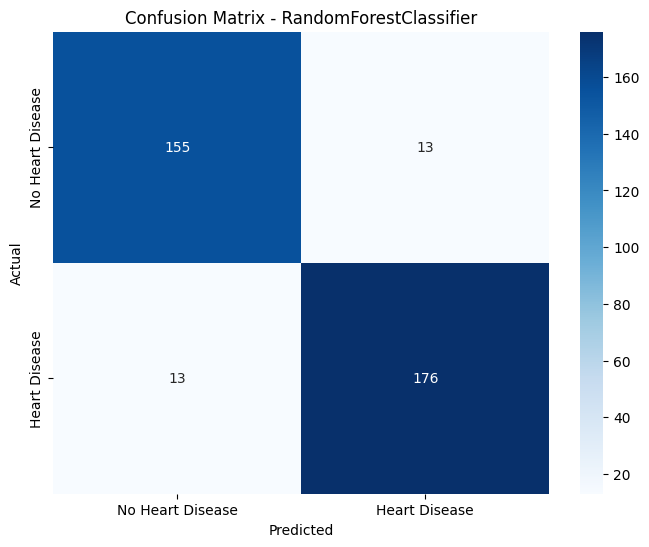

In [258]:
# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [271]:
import shap

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# SHAP explanation
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values[0], X_test_scaled)  # [1] for positive class

# Evaluate the model
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [270]:
import shap

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# SHAP explanation
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
# Use shap_values[1] for the positive class (index 1) or shap_values[0] for negative class (index 0)
# shap_values[1] selects the SHAP values for the positive class (assuming binary classification)
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X.columns) # added feature_names

# Evaluate the model
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

### Saving the Trained Model

In [259]:
import pickle

In [263]:
filename = 'heart_disease_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [264]:
# Loading the saved
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [266]:
# Example input data
input_data = (55, 1, 4, 122, 223, 1, 1, 100, 0, 0.0, 2)

# Convert input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape input data to match the model's input shape (1 row, many features)
reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)

# Assuming 'scalar' is the StandardScaler fitted during training (use the same scaler)
input_data_scaled = scalar.transform(reshaped_input_data)

# Now make a prediction using the loaded model
prediction = loaded_model.predict(input_data_scaled)

# Print the prediction
print(prediction)

if prediction[0] == 0:
    print('The person does not have heart disease')
else:
    print('The person has heart disease')

[1]
The person has heart disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import os
print("Number of available cores:", os.cpu_count())


In [ ]:
Logistic regression
KNeighborsClassifier
SVM
Decision Tree
GradientBoosting Classifier
GaussianNB
Random forest